In [287]:
# Import necessary libraries
import pandas as pd
import numpy as np
import spacy
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
# Download NLTK stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to D:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [288]:
# Step 1: Data Collection
def load_dataset(file_path):
    try:
        data = pd.read_csv(file_path, encoding="latin1")
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        raise
    except UnicodeDecodeError as e:
        print(f"Encoding error: {e}")
        raise
    return data


In [289]:
# Step 2: Text Preprocessing
def preprocess_text(text):
    # Remove HTML tags, special characters, and extra whitespace
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[\^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Convert text to lowercase
    text = text.lower()

    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# Apply preprocessing to dataset
def preprocess_dataset(data):
    if 'article_text' not in data.columns:
        raise ValueError("Column 'article_text' not found in the dataset.")

    data['cleaned_text'] = data['article_text'].apply(preprocess_text)
    return data


In [290]:
# Step 3: Named Entity Recognition (NER)
def perform_ner(data):
    nlp = spacy.load("en_core_web_sm")

    org_counts = []
    gpe_counts = []
    person_counts = []

    for doc in nlp.pipe(data['cleaned_text'], batch_size=50):
        org_counts.append(len([ent for ent in doc.ents if ent.label_ == 'ORG']))
        gpe_counts.append(len([ent for ent in doc.ents if ent.label_ == 'GPE']))
        person_counts.append(len([ent for ent in doc.ents if ent.label_ == 'PERSON']))

    data['org_count'] = org_counts
    data['gpe_count'] = gpe_counts
    data['person_count'] = person_counts
    return data

In [291]:
# Step 4: Feature Engineering
def add_features(data):
    # Add article length feature
    data['article_length'] = data['cleaned_text'].apply(lambda x: len(x.split()))

    # Add sentiment score (placeholder for sentiment analysis function)
    data['sentiment_score'] = np.random.uniform(-1, 1, size=len(data))  # Replace with actual sentiment analysis

    return data

In [292]:
# Step 5: Predictive Modeling
def train_predictive_model(data):
    features = ['org_count', 'gpe_count', 'person_count', 'article_length', 'sentiment_score']
    target = 'engagement_metric'  # Replace with the actual target column in the dataset

    if target not in data.columns:
        raise ValueError(f"Target column '{target}' not found in dataset!")

    X = data[features]
    y = data[target]

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Train Random Forest Regressor
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluate models
    lr_predictions = lr_model.predict(X_test)
    rf_predictions = rf_model.predict(X_test)

    print("Linear Regression MAE:", mean_absolute_error(y_test, lr_predictions))
    print("Random Forest MAE:", mean_absolute_error(y_test, rf_predictions))

    return lr_model, rf_model


In [293]:
# Step 6: Data Visualization
def visualize_data(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['article_length'], kde=True, bins=30, color='blue')
    plt.title("Distribution of Article Length")
    plt.xlabel("Article Length (words)")
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='article_length', y='engagement_metric', data=data, color='red')
    plt.title("Article Length vs. Engagement Metric")
    plt.xlabel("Article Length (words)")
    plt.ylabel("Engagement Metric")
    plt.show()

# Main Workflow
    
def main():
    file_path = "Articles.csv"  # File uploaded by user
def preprocess_dataset(data):
    print("Available columns in the dataset:", data.columns)  # Add this line for debugging
    if 'article_text' not in data.columns:
        raise ValueError("Column 'article_text' not found in the dataset.")
    data['cleaned_text'] = data['article_text'].apply(preprocess_text)
    return data

    # Load and preprocess data
    data = load_dataset(file_path)
    data = preprocess_dataset(data)

    # Perform NER and feature engineering
    data = perform_ner(data)
    data = add_features(data)

    # Train predictive models
    train_predictive_model(data)

    # Visualize data
    visualize_data(data)

if __name__ == "__main__":
    main()


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Article   2692 non-null   object
 1   Date      2692 non-null   object
 2   Heading   2692 non-null   object
 3   NewsType  2692 non-null   object
dtypes: object(4)
memory usage: 84.2+ KB
None

Sample Rows:
                                             Article      Date  \
0  KARACHI: The Sindh government has decided to b...  1/1/2015   
1  HONG KONG: Asian markets started 2015 on an up...  1/2/2015   
2  HONG KONG:  Hong Kong shares opened 0.66 perce...  1/5/2015   
3  HONG KONG: Asian markets tumbled Tuesday follo...  1/6/2015   
4  NEW YORK: US oil prices Monday slipped below $...  1/6/2015   

                                             Heading  NewsType  
0  sindh govt decides to cut public transport far...  business  
1                    asia stocks up in new year trad  busines

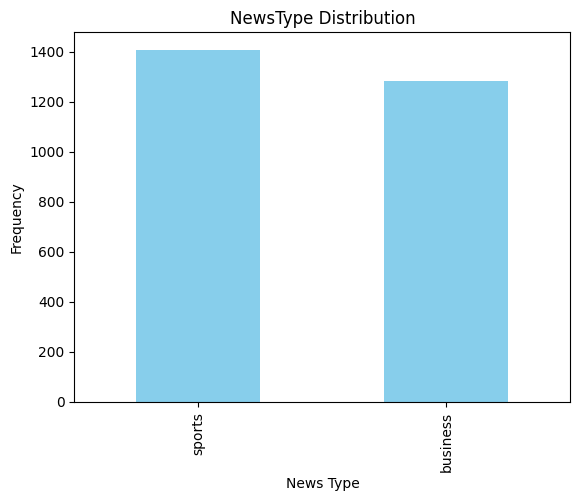


Article Length Statistics:
count    2692.000000
mean      291.274889
std       173.758439
min        32.000000
25%       166.000000
50%       263.500000
75%       381.000000
max      3051.000000
Name: article_length, dtype: float64


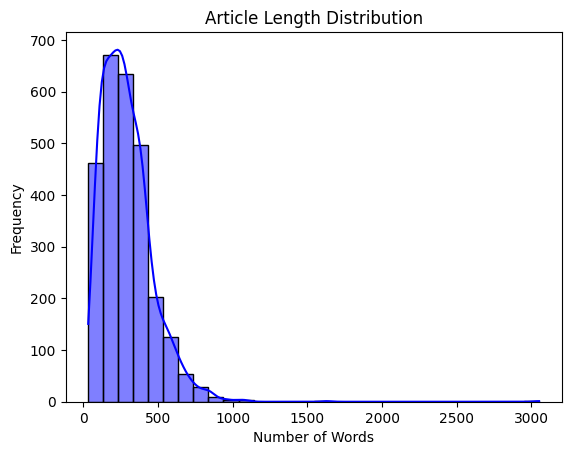


Features and Target for Modeling:
   article_length  engagement_metric
0             106          38.675006
1             736          25.920631
2              37           8.266160
3             523          57.236168
4             606          24.461850


In [294]:
# Adjusted Workflow for Dataset Analysis

# Load dataset and basic analysis
data = pd.read_csv("Articles.csv", encoding="latin1")
print("Dataset Overview:")
print(data.info())
print("\nSample Rows:")
print(data.head())

# Rename column
data.rename(columns={"Article": "article_text"}, inplace=True)

# Add placeholder target column for modeling
data["engagement_metric"] = np.random.uniform(0, 100, size=len(data))

# Convert Date column to datetime
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

# Analyze NewsType distribution
news_type_counts = data["NewsType"].value_counts()
print("\nNewsType Distribution:")
print(news_type_counts)

# Visualize NewsType distribution
news_type_counts.plot(kind="bar", title="NewsType Distribution", color="skyblue")
plt.xlabel("News Type")
plt.ylabel("Frequency")
plt.show()

# Analyze article length
data["article_length"] = data["article_text"].apply(lambda x: len(str(x).split()))
print("\nArticle Length Statistics:")
print(data["article_length"].describe())

# Visualize article length
sns.histplot(data["article_length"], kde=True, bins=30, color="blue")
plt.title("Article Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Placeholder modeling steps (if required)
print("\nFeatures and Target for Modeling:")
print(data[["article_length", "engagement_metric"]].head())
